In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\USER\OneDrive - universidadean.edu.co\2. Semestre\Seminario de investigación\Modulo 2\Modelo ML\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:00:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔍 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5650
           1       0.55      0.25      0.35       255
           2       0.58      0.40      0.47       182
           3       0.88      0.94      0.91       882

    accuracy                           0.94      6969
   macro avg       0.74      0.65      0.68      6969
weighted avg       0.93      0.94      0.93      6969



C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_29960\3999170926.py:43: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\USER\OneDrive - universidadean.edu.co\2. Semestre\Seminario de investigación\Modulo 2\Modelo ML\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


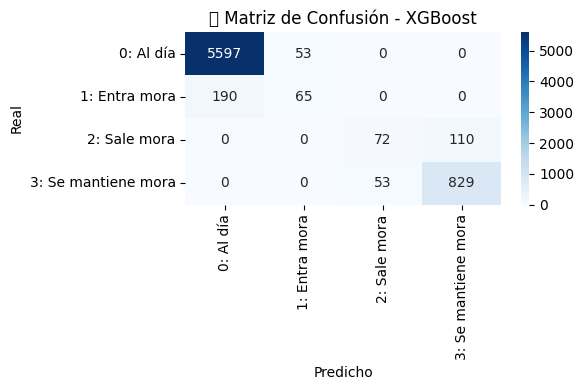

In [6]:
# 1. Cargar dataset PCA desde el CSV
ruta_csv = r"C:\Users\USER\OneDrive - universidadean.edu.co\2. Semestre\Seminario de investigación\Modulo 2\Modelo ML\data\processed\df_completo_escalado.csv"
df_scaled = pd.read_csv(ruta_csv)

# 2. Separar X (features) e y (target)
# Si estás trabajando con df_scaled o el CSV completo
X = df_scaled.drop(columns=['MORA_ACTUAL', 'MORA_SIGUIENTE', 'ESTADO_MORA_SIGUIENTE'])
y = df_scaled['ESTADO_MORA_SIGUIENTE'].astype(int)


# 3. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Crear y entrenar modelo XGBoost
xgb = XGBClassifier(
    objective='multi:softmax',  # multiclass
    num_class=4,
    eval_metric='mlogloss',
    random_state=42,
    use_label_encoder=False
)
xgb.fit(X_train, y_train)

# 5. Predicciones
y_pred = xgb.predict(X_test)

# 6. Reporte de clasificación
print("🔍 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 7. Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0: Al día', '1: Entra mora', '2: Sale mora', '3: Se mantiene mora'],
            yticklabels=['0: Al día', '1: Entra mora', '2: Sale mora', '3: Se mantiene mora'])
plt.title("📊 Matriz de Confusión - XGBoost")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.tight_layout()
plt.show()
